# ANN

# Fashion MNIST


<br> By Margaret Maynard-Reid, 4/24/2018

![alt text](https://github.com/margaretmz/deep-learning/blob/master/images/modern%20dl_fash-mnist_keras.png?raw=1)

## Why Fashion-MNIST?


*   MNIST is too easy
*   MNIST is overused
*   MNIST can not represent modern Computer Vision tasks

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.metrics import accuracy_score

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data 반복실행 해보자

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 5 Sandal


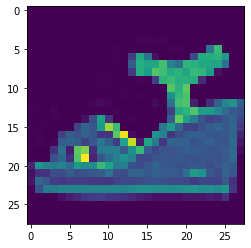

In [ ]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = np.random.randint(0, 59999)
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


##  코딩 task!

1. 전처리
    * x : sc_____
    * y : _______ encoding

2. 모델링
    * model에 모델 선언
    * Input layer에 어떻게 전달할 것인지 고민 필요
    * 쭈우우우욱 늘려주는 레이어를 사용할 것 (F______)
    * 히든레이어는 최소 3개를 쓸 것!
    * 노드 수는 512개를 기본으로 시작
    * 자유롭게 바꿔가며 성능을 볼 것

3. 학습
    * epochs=50, validation_split=0.2
    * early stopping

In [ ]:
#############
# Your Code #
#############
print(x_train.max(), x_train.min() )

max_n = x_train.max()
x_train = x_train / max_n
x_test = x_test / max_n

print(x_train.max(), x_train.min() )

255 0
1.0 0.0


In [ ]:
#############
# Your Code #
#############
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
len_y = len(set(y_train))

In [ ]:
y_train = to_categorical(y_train, len_y)
y_test = to_categorical(y_test, len_y)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
#############
# Your Code #
#############
# Sequential

# 1번. 세션 클리어
keras.backend.clear_session()

# 2번. 모델 선언
model = keras.models.Sequential()

# 3번. 모델 블록 조립
model.add( keras.layers.Input(shape=(x_train.shape[1] , x_train.shape[2])) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(512, activation='relu') )
model.add( keras.layers.Dense(512, activation='relu') )
model.add( keras.layers.Dense(256, activation='relu') )
model.add( keras.layers.Dense(128, activation='relu') )
model.add( keras.layers.Dense(64, activation='relu') )
model.add( keras.layers.Dense(32, activation='relu') )
model.add( keras.layers.Dense(10, activation='softmax') )

# 4번. 모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam())

#### 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2

In [ ]:
#############
# Your Code #
#############
# Functional

# 1번. 세션 클리어
keras.backend.clear_session()

# 2번. 레이어 엮기
il = keras.layers.Input(shape=(28, 28))
fl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(512, activation='relu')(fl)
hl = keras.layers.Dense(512, activation='relu')(hl)
hl = keras.layers.Dense(256, activation='relu')(hl)
hl = keras.layers.Dense(128, activation='relu')(hl)
hl = keras.layers.Dense(64, activation='relu')(hl)
hl = keras.layers.Dense(32, activation='relu')(hl)
ol = keras.layers.Dense(10, activation='softmax')(hl)

# 3번. 모델의 시작과 끝 지정
model = keras.models.Model(il, ol)

# 4번. 모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam())

#### 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8256  

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [ ]:
#############
# Your Code #
#############

model.fit(x_train, y_train, validation_split=0.2,
          verbose=1, epochs=1000, callbacks=[es])

Epoch 1/1000
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5426 - accuracy: 0.8043 - val_loss: 0.4570 - val_accuracy: 0.8273
Epoch 2/1000
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3969 - accuracy: 0.8563 - val_loss: 0.3970 - val_accuracy: 0.8603
Epoch 3/1000
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3567 - accuracy: 0.8705 - val_loss: 0.3876 - val_accuracy: 0.8573
Epoch 4/1000
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3298 - accuracy: 0.8786 - val_loss: 0.3454 - val_accuracy: 0.8767
Epoch 5/1000
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3127 - accuracy: 0.8861 - val_loss: 0.3541 - val_accuracy: 0.8777
Epoch 6/1000
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2935 - accuracy: 0.8931 - val_loss: 0.3342 - val_accuracy: 0.8876
Epoch 7/1000
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2848 - accuracy: 0.8954 - val_loss: 0.3234 -

## Visualize prediction

위에서 지키라고 한 사항들 안지키면 동작을 안할껄...?

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])
y_hat = model.predict(x_test).argmax(axis=1)


 Test accuracy: 0.8794999718666077


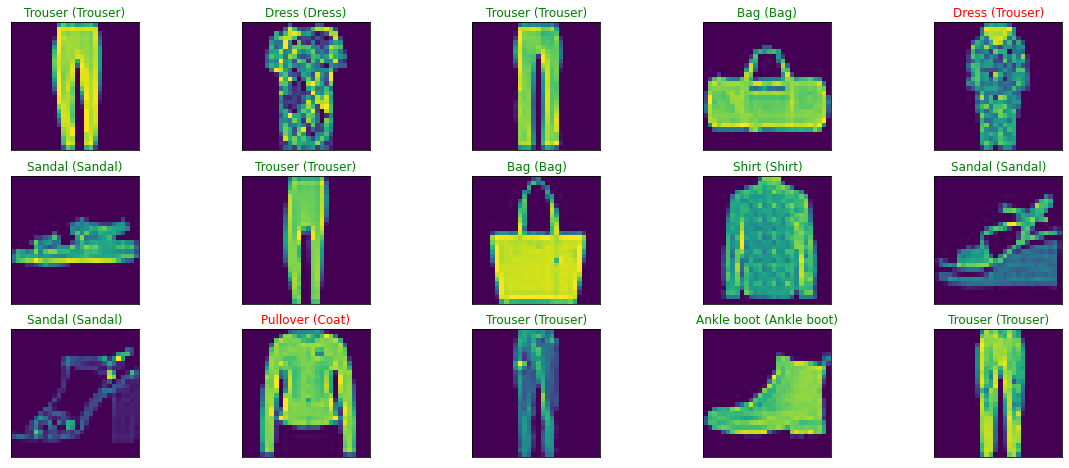

In [23]:
####### 반복실행해보자

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    # ax.imshow(np.squeeze(x_test[index]))
    ax.imshow(np.squeeze(x_test[index].reshape([28,-1])) )
    predict_index = y_hat[index]
    true_index = y_test[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [ ]:
predict_index, true_index

(0, 0)